In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from matplotlib.colors import ListedColormap
import re


plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] =False

In [2]:
product = pd.read_csv("Zigzag_products.csv")
review = pd.read_csv("Zigzag_reviews.csv")

In [3]:
review['리뷰 코멘트'] = review['리뷰 코멘트'].str.replace('\n', ' ', regex=False)
review.head(3)

,리뷰순서,카테고리,브랜드,상품명,작성자,작성 날짜,옵션,사이즈,퀄리티,색감,정보,리뷰 점수,리뷰 코멘트,배송형태,포토리뷰,상품ID
0,1,의류,퍼빗,퍼빗 [랩티1등🏆/누적5만장🩰/모델전색소장💗/평점4.8극찬💭/기모ver.] 단독제작...,솔링이,25.02.01,-3kg블랙,정사이즈예요,아주 만족해요,화면과 비슷해요,158cm42kg상의 44,5,[158/42kg) 이 옷이 유독 슬림해보이는 거 같아요 ㅎㅎ 여리여리한 느낌이 ...,직진,있음,130108350
1,2,의류,퍼빗,퍼빗 [랩티1등🏆/누적5만장🩰/모델전색소장💗/평점4.8극찬💭/기모ver.] 단독제작...,콩콩땅,25.01.30,발렛베이지,정사이즈예요,아주 만족해요,화면과 비슷해요,158cm50kg상의 44,5,"⭐️ 스펙 : 158cm/50kg , 상체 보다 하체 발달형 ⭐️ 핏, 사이즈 ...",직진,있음,130108350
2,3,의류,퍼빗,퍼빗 [랩티1등🏆/누적5만장🩰/모델전색소장💗/평점4.8극찬💭/기모ver.] 단독제작...,미소세계,25.01.26,발렛베이지,정사이즈예요,아주 만족해요,화면과 비슷해요,160cm53kg상의 55,5,발레코어룩의 정석인 아이템 발견했네여!!!ㅎㅎ 완전 여리여리해보이는 효과가 있어욤ㅠ...,일반,있음,130108350


### 글자 수 분포

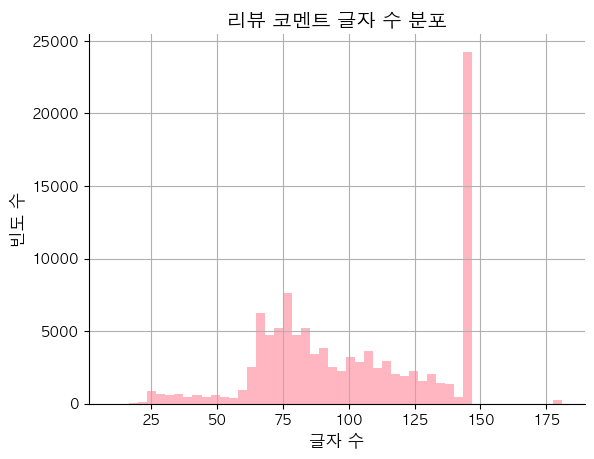

In [4]:
# 리뷰 코멘트 글자 수 계산 후 히스토그램 그리기
ax = review['리뷰 코멘트'].str.len().hist(bins=50, color='lightpink')

# 축 제목과 레이블 설정
ax.set_xlabel('글자 수', fontsize=12)
ax.set_ylabel('빈도 수', fontsize=12)

# 그래프 제목 설정
ax.set_title('리뷰 코멘트 글자 수 분포', fontsize=14)

# 그래프 테두리 제거
plt.gca().spines[['top', 'right']].set_visible(False)

# 그래프 표시
plt.show()

### 토큰 분포

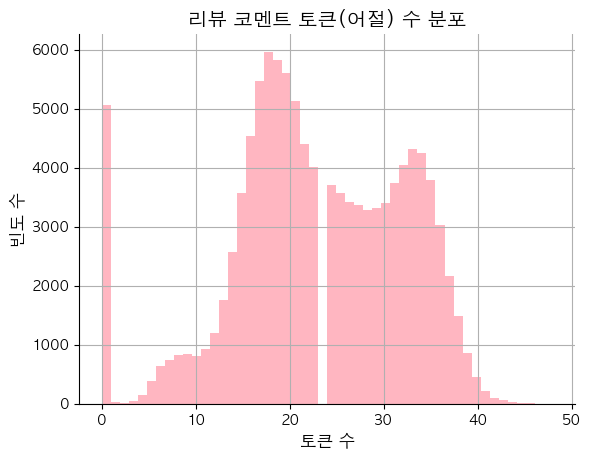

In [5]:
# 결측값(NaN) 처리 후 토큰 수 계산
ax = review['리뷰 코멘트'].fillna('').str.split().map(lambda x: len(x)).hist(bins=50, color='lightpink')

# 축 제목과 레이블 설정
ax.set_xlabel('토큰 수', fontsize=12)
ax.set_ylabel('빈도 수', fontsize=12)

# 그래프 제목 설정
ax.set_title('리뷰 코멘트 토큰(어절) 수 분포', fontsize=14)

# 그래프 테두리 제거
plt.gca().spines[['top', 'right']].set_visible(False)

# 그래프 표시
plt.show()


### 명사 추출

In [7]:
# 설치 완료 테스트

from eunjeon import Mecab
m = Mecab(dicpath='/usr/local/lib/mecab/dic/mecab-ko-dic')
m.pos("이것은 메캅 테스트입니다. 사용자 사전을 등록하기 전입니다. 비타500")

[('이것', 'NP'),
 ('은', 'JX'),
 ('메', 'NNP'),
 ('캅', 'NNP'),
 ('테스트', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('.', 'SF'),
 ('사용자', 'NNG'),
 ('사전', 'NNG'),
 ('을', 'JKO'),
 ('등록', 'NNG'),
 ('하', 'XSV'),
 ('기', 'ETN'),
 ('전', 'NNG'),
 ('입니다', 'VCP+EF'),
 ('.', 'SF'),
 ('비타', 'NNP'),
 ('500', 'SN')]

In [8]:
## 명사별 개수
# 명사 추출 > 전체 코퍼스로 구축 > 개수 세기 > 시각화
from eunjeon import Mecab
m = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

1. 전체

In [13]:
titles = review['리뷰 코멘트'].to_list()

# 텍스트 불용어 제거
def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", " ", text)  # 한글, 영어, 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text)  # 연속된 공백 제거
    return text.strip()

n_corpus = []
for t in titles:
    t = clean_text(str(t))
    n_corpus += m.nouns(t) #mecab에서 명사 추출

count = collections.Counter(n_corpus)
most = count.most_common() #빈도 수 순으로 추출


x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)


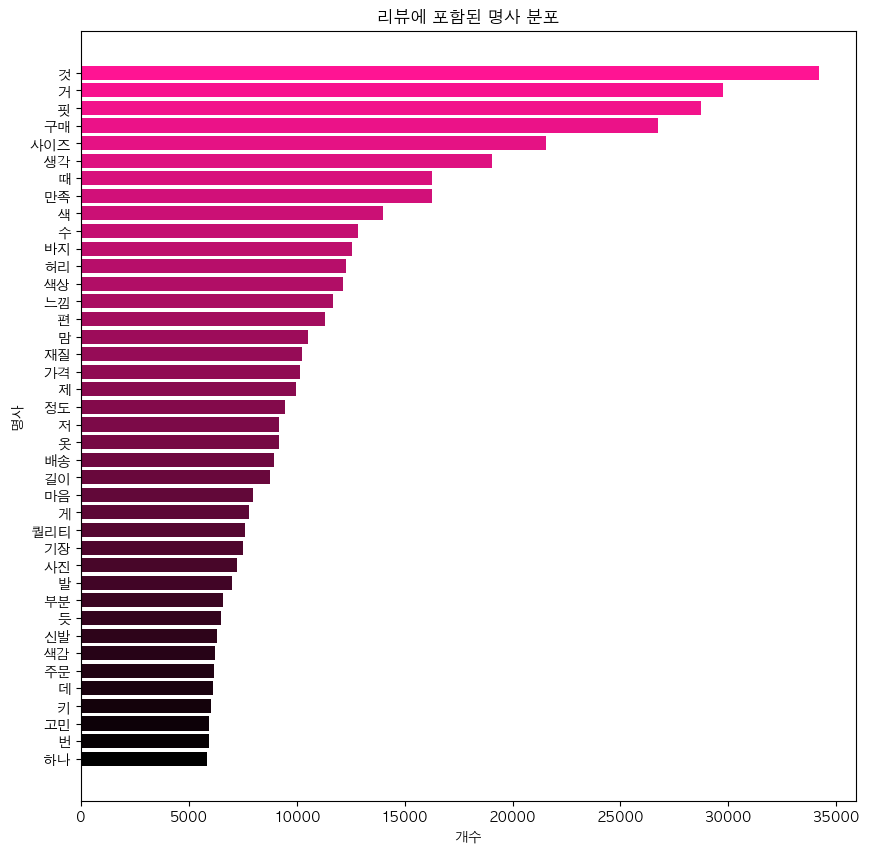

In [14]:
# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("명사")

plt.show()

2. 카테고리별 - 의류

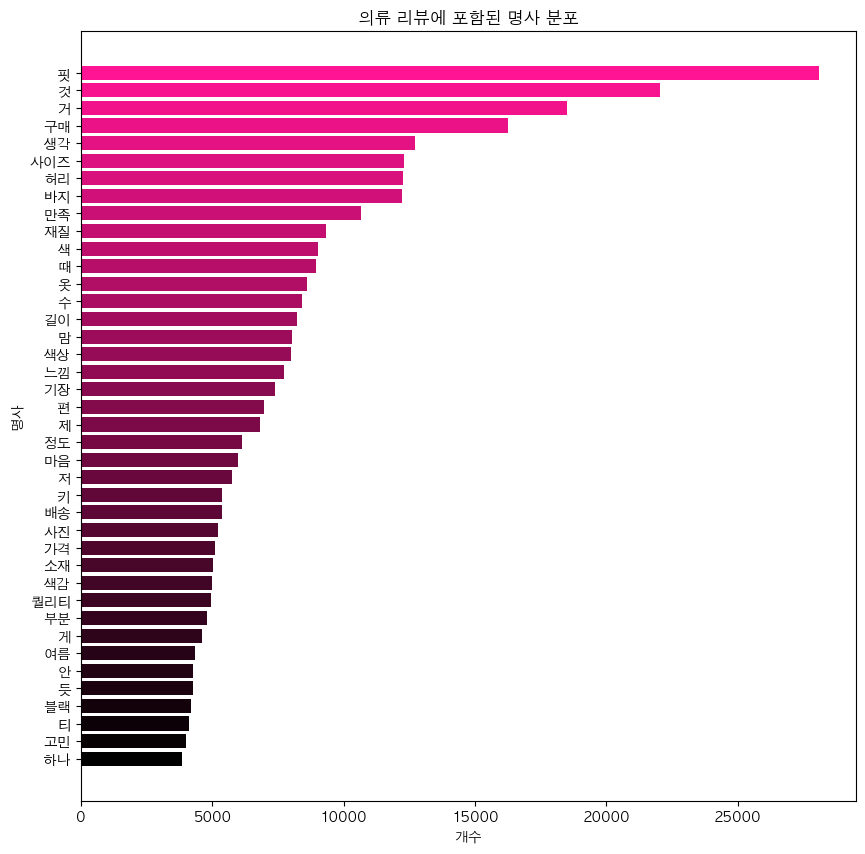

In [15]:
titles = review.query("카테고리 == '의류'")['리뷰 코멘트'].to_list()

# 텍스트 불용어 제거
def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", " ", text)  # 한글, 영어, 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text)  # 연속된 공백 제거
    return text.strip()

n_corpus = []
for t in titles:
    t = clean_text(str(t))
    n_corpus += m.nouns(t) #mecab에서 명사 추출

count = collections.Counter(n_corpus)
most = count.most_common() #빈도 수 순으로 추출


x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("의류 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("명사")

plt.show()

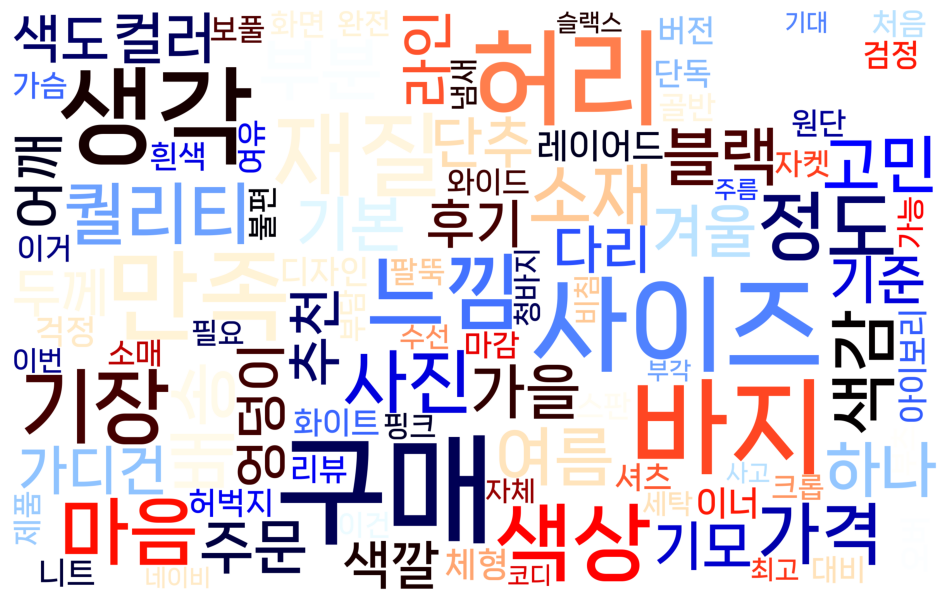

In [85]:
from wordcloud import WordCloud
import collections
import matplotlib.pyplot as plt

# 2글자 이상 명사 필터링
n_corpus2 = list(filter(lambda a: len(a) >= 2, n_corpus))
count = collections.Counter(n_corpus2)
most = count.most_common()

def show_wordcloud(data):
    wordcloud = WordCloud(
        font_path='/Users/chominyeong/Library/Fonts/NanumSquareNeo-cBd.ttf',  # 나눔스퀘어 폰트 경로
        background_color='white',
        max_words=100,
        max_font_size=100,  # 글자 크기 최대값을 크게 설정
        scale=3,
        random_state=1,
        colormap='flag',  # 핑크 계열 색상
        width=800,  # 이미지 너비
        height=500   # 이미지 높이
    )

    wordcloud = wordcloud.generate_from_frequencies(dict(data))  # frequencies로 단어 빈도 기반 생성

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(most)


2. 카테고리별 - 가방

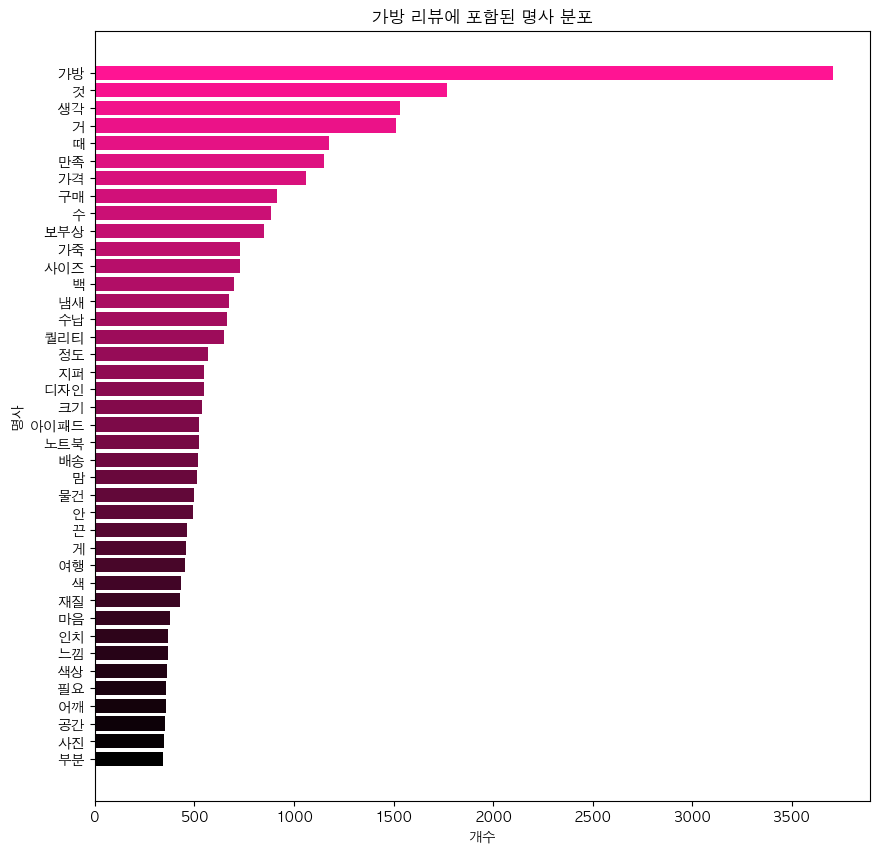

In [16]:
titles = review.query("카테고리 == '가방'")['리뷰 코멘트'].to_list()

# 텍스트 불용어 제거
def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", " ", text)  # 한글, 영어, 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text)  # 연속된 공백 제거
    return text.strip()

n_corpus = []
for t in titles:
    t = clean_text(str(t))
    n_corpus += m.nouns(t) #mecab에서 명사 추출

count = collections.Counter(n_corpus)
most = count.most_common() #빈도 수 순으로 추출


x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("가방 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("명사")

plt.show()

2. 카테고리별 - 슈즈

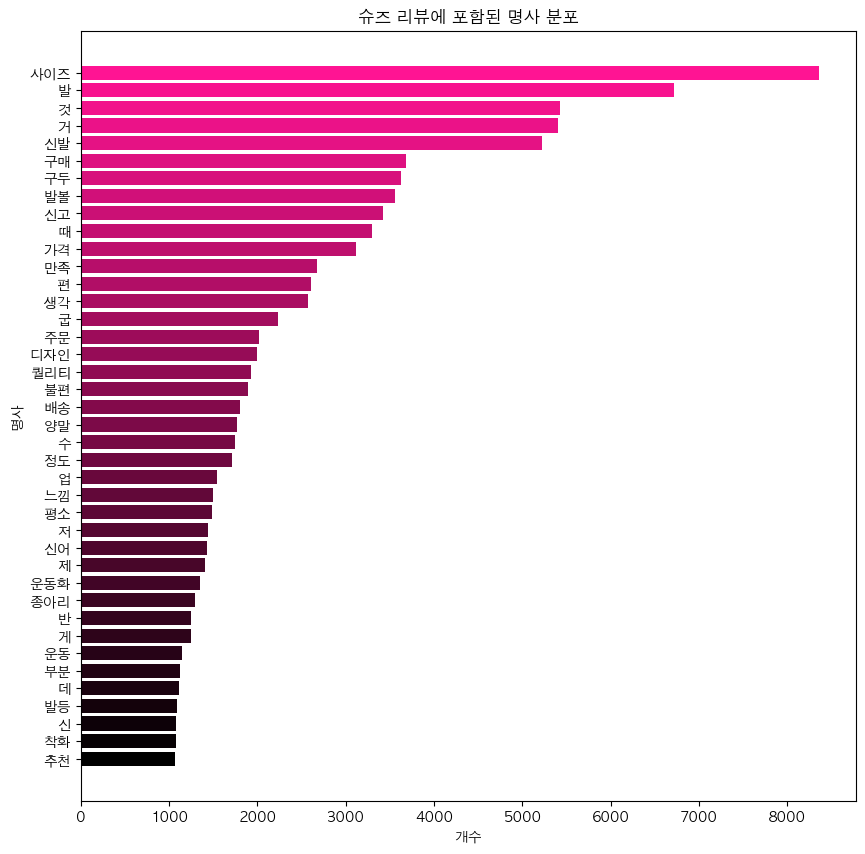

In [14]:
titles = review.query("카테고리 == '슈즈'")['리뷰 코멘트'].to_list()

# 텍스트 불용어 제거
def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", " ", text)  # 한글, 영어, 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text)  # 연속된 공백 제거
    return text.strip()

n_corpus = []
for t in titles:
    t = clean_text(str(t))
    n_corpus += m.nouns(t) #mecab에서 명사 추출

count = collections.Counter(n_corpus)
most = count.most_common() #빈도 수 순으로 추출


x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("슈즈 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("명사")

plt.show()

2. 카테고리별 - 뷰티

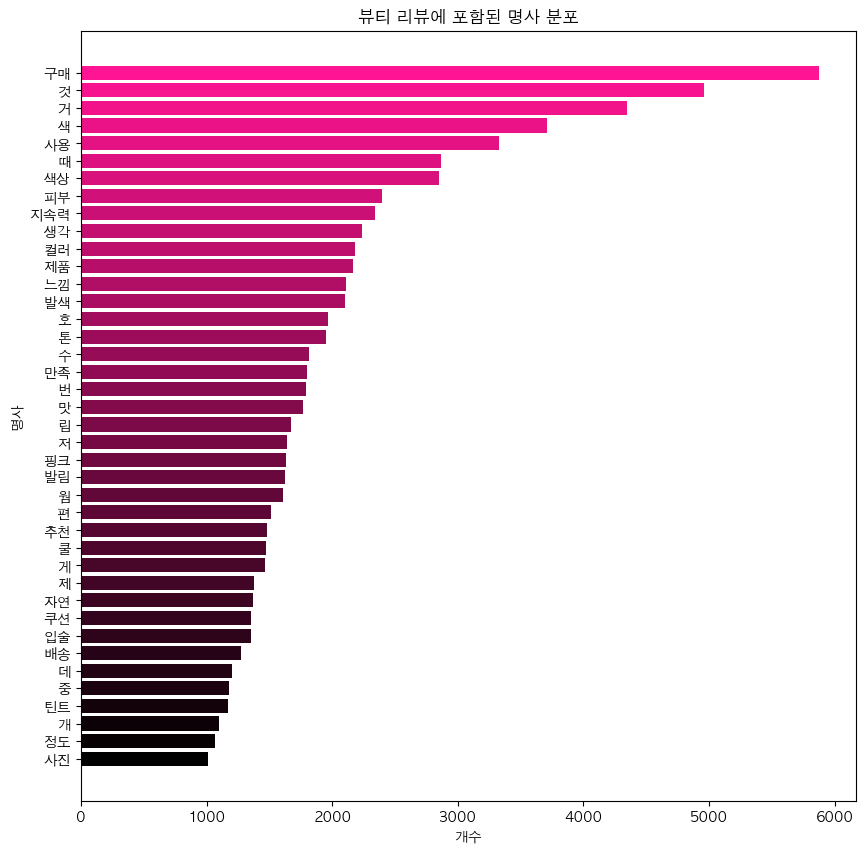

In [13]:
titles = review.query("카테고리 == '뷰티'")['리뷰 코멘트'].to_list()

# 텍스트 불용어 제거
def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", " ", text)  # 한글, 영어, 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text)  # 연속된 공백 제거
    return text.strip()

n_corpus = []
for t in titles:
    t = clean_text(str(t))
    n_corpus += m.nouns(t) #mecab에서 명사 추출

count = collections.Counter(n_corpus)
most = count.most_common() #빈도 수 순으로 추출


x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("뷰티 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("명사")

plt.show()

### 2글자 이상 명사 추출

In [22]:
titles = review['리뷰 코멘트'].to_list()

n_corpus2 = []
for t in titles:
    t = clean_text(str(t))
    for n in m.nouns(t):
        if len(n)>1:
            n_corpus2.append(n)

count = collections.Counter(n_corpus2)
most = count.most_common() #빈도 수 순으로 추출

x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

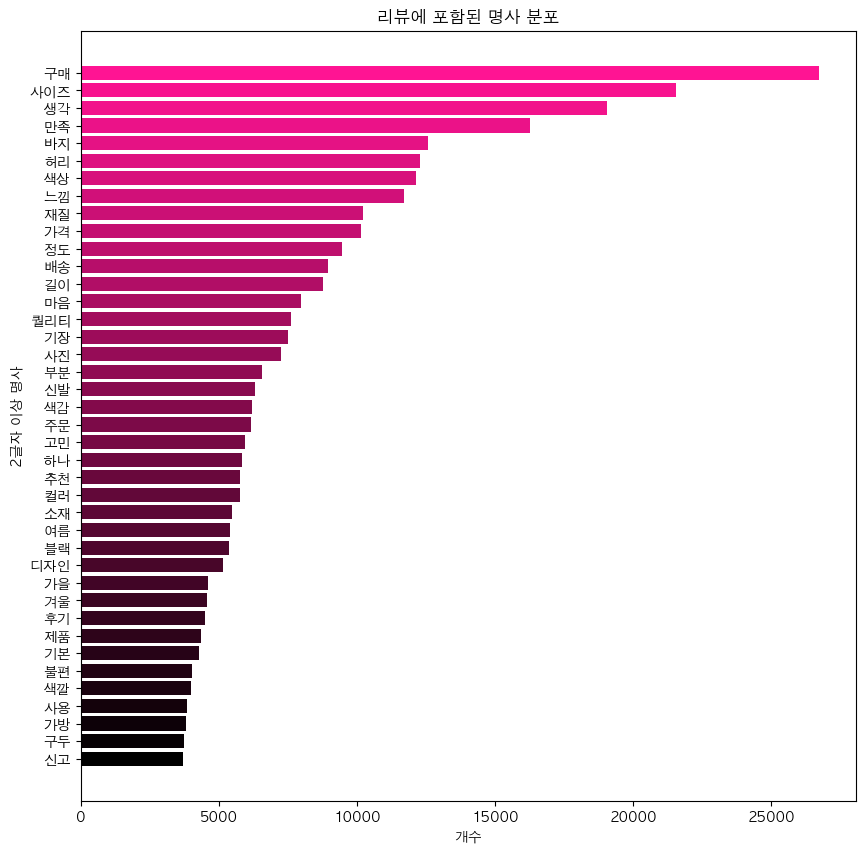

In [23]:
# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("2글자 이상 명사")

plt.show()

2-1. 카테고리별 - 의류

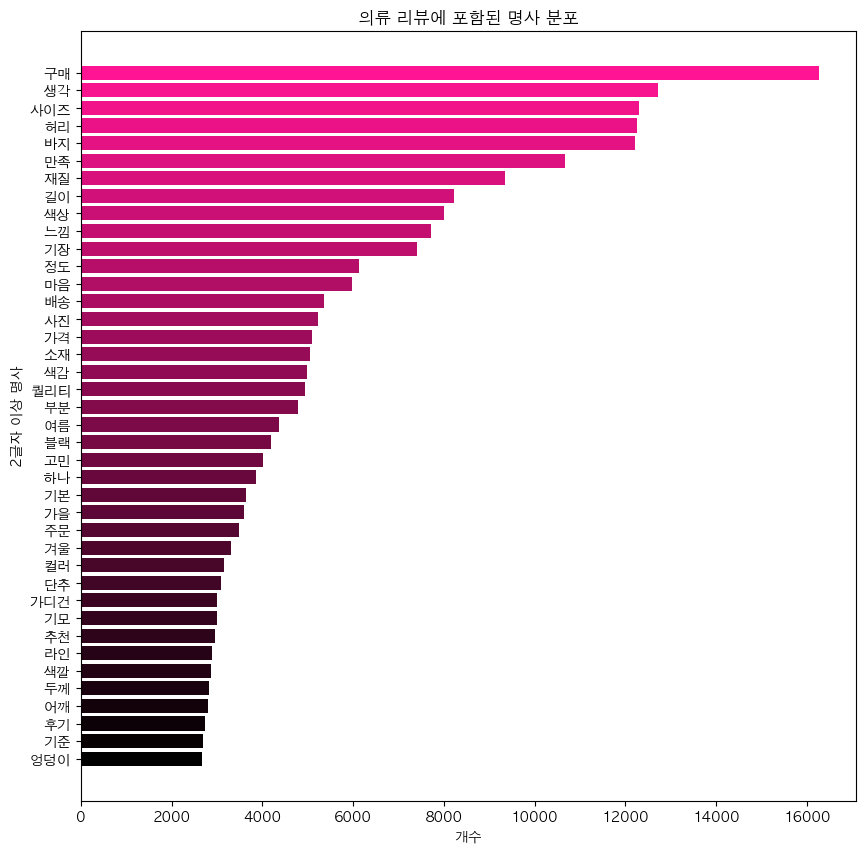

In [25]:
titles = review.query("카테고리 == '의류'")['리뷰 코멘트'].to_list()

n_corpus2 = []
for t in titles:
    t = clean_text(str(t))
    for n in m.nouns(t):
        if len(n)>1:
            n_corpus2.append(n)

count = collections.Counter(n_corpus2)
most = count.most_common() #빈도 수 순으로 추출

x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)
    
# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("의류 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("2글자 이상 명사")

plt.show()

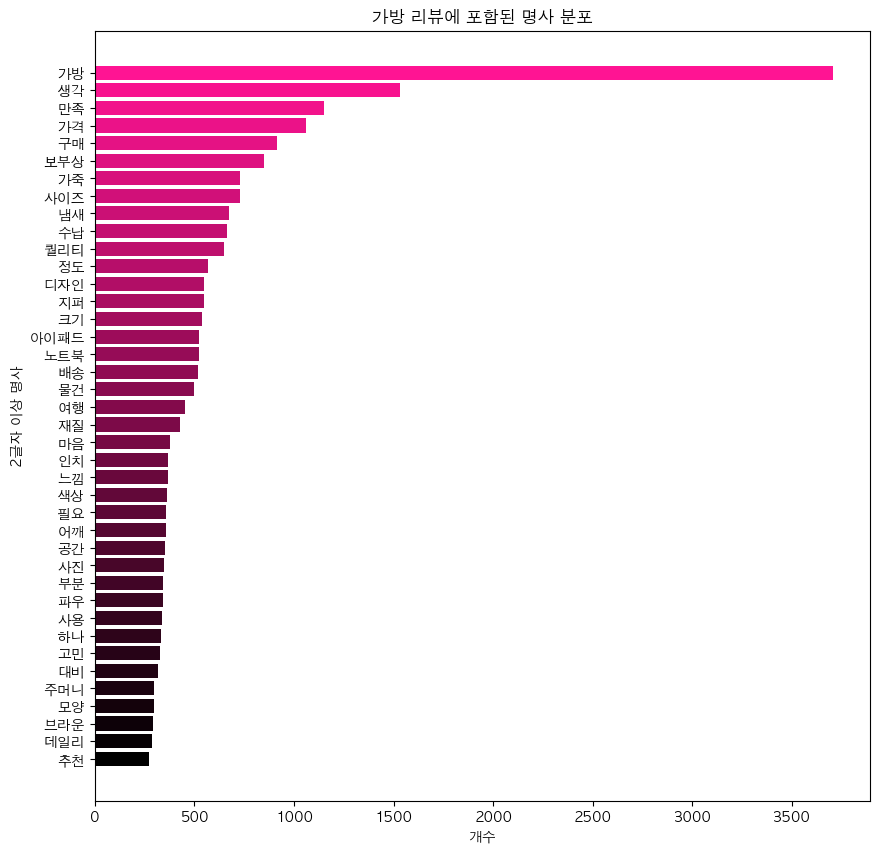

In [27]:
titles = review.query("카테고리 == '가방'")['리뷰 코멘트'].to_list()

n_corpus2 = []
for t in titles:
    t = clean_text(str(t))
    for n in m.nouns(t):
        if len(n)>1:
            n_corpus2.append(n)

count = collections.Counter(n_corpus2)
most = count.most_common() #빈도 수 순으로 추출

x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)
    
# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("가방 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("2글자 이상 명사")

plt.show()

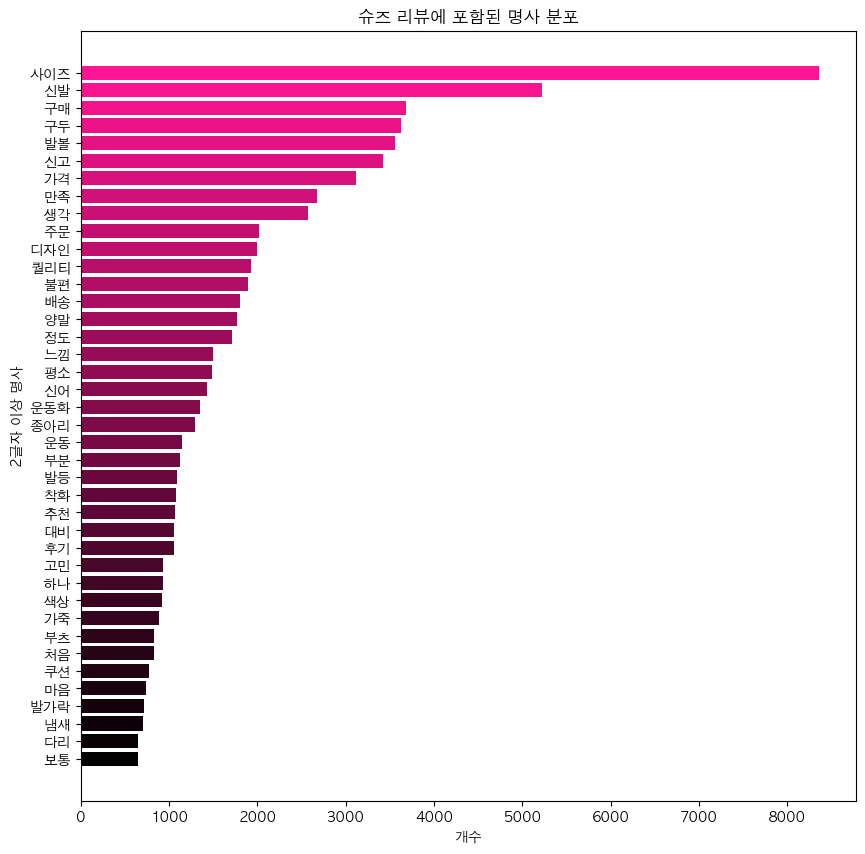

In [28]:
titles = review.query("카테고리 == '슈즈'")['리뷰 코멘트'].to_list()

n_corpus2 = []
for t in titles:
    t = clean_text(str(t))
    for n in m.nouns(t):
        if len(n)>1:
            n_corpus2.append(n)

count = collections.Counter(n_corpus2)
most = count.most_common() #빈도 수 순으로 추출

x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)
    
# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("슈즈 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("2글자 이상 명사")

plt.show()

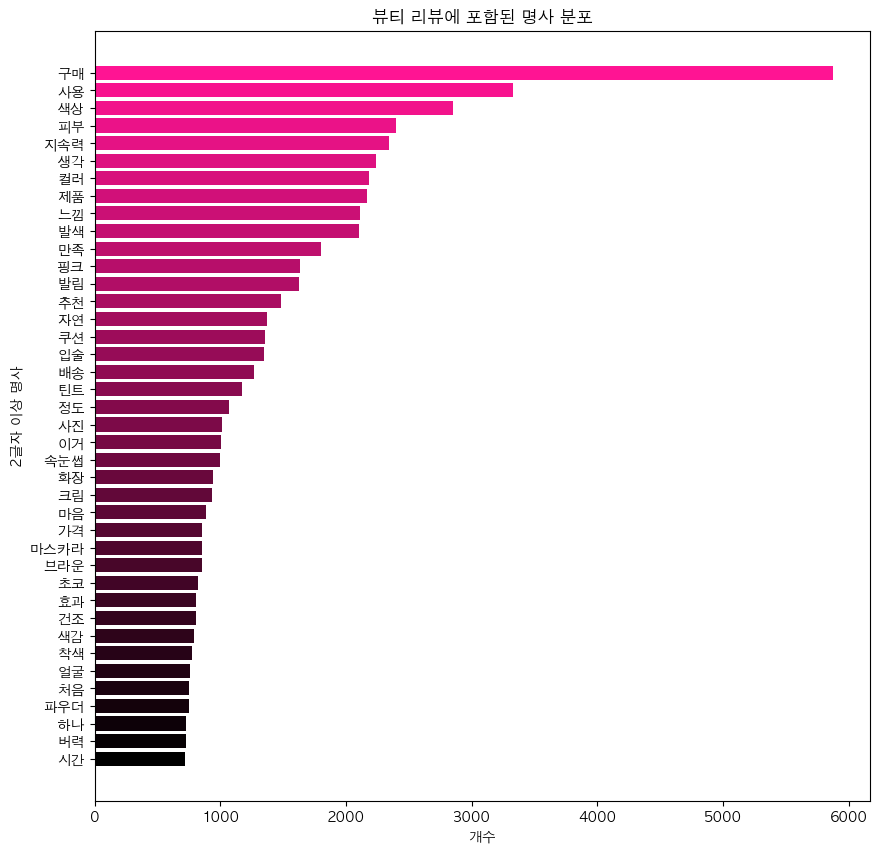

In [30]:
titles = review.query("카테고리 == '뷰티'")['리뷰 코멘트'].to_list()

n_corpus2 = []
for t in titles:
    t = clean_text(str(t))
    for n in m.nouns(t):
        if len(n)>1:
            n_corpus2.append(n)

count = collections.Counter(n_corpus2)
most = count.most_common() #빈도 수 순으로 추출

x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)
    
# y 값을 기준으로 내림차순 정렬
sorted_indices = np.argsort(y)[::-1]
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# #FF1493 색상 (찐한 핑크)과 #000000 색상 (검은색)
start_color = np.array([255, 20, 147]) / 255  # #FF1493 (Deep Pink)의 RGB 값을 0~1 범위로 정규화
end_color = np.array([0, 0, 0])  # 검은색

# 그라데이션을 위한 색상 배열 생성
gradients = np.linspace(start_color, end_color, len(x_sorted))

plt.figure(figsize=(10, 10))

# 바의 색상을 찐한 핑크에서 검은색으로 그라데이션으로 설정
bars = plt.barh(x_sorted[::-1], y_sorted[::-1], color=gradients[::-1])

# 그래프 제목과 축 레이블
plt.title("뷰티 리뷰에 포함된 명사 분포")
plt.xlabel("개수")
plt.ylabel("2글자 이상 명사")

plt.show()

### n-gram

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
titles = review['리뷰 코멘트'].to_list()

m_corpus = []
for t in titles:
    t = clean_text(str(t))
    m_corpus.append(' '.join(m.morphs(t)))


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

In [41]:
top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram 형태소')]

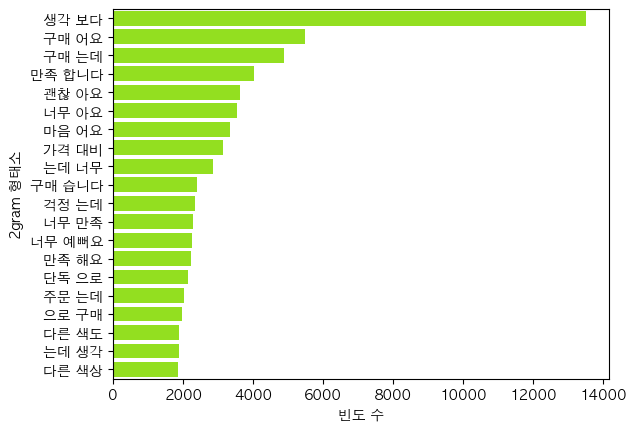

In [43]:
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '2gram 형태소')

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '3gram 형태소')]

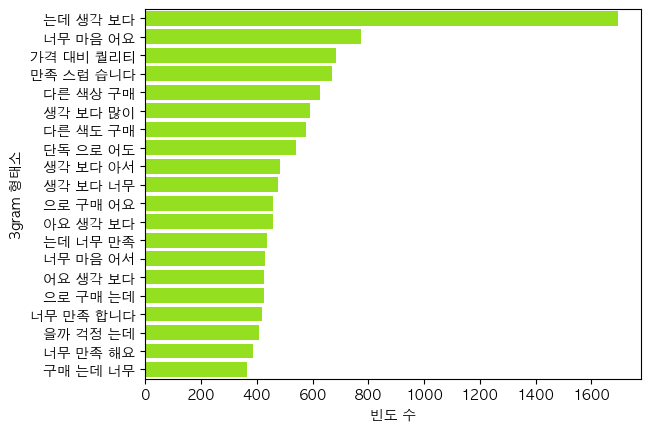

In [ ]:
## 3-gram
top_n_bigrams=get_top_ngram(m_corpus,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')

카테고리 - 의류

In [47]:
titles = review.query("카테고리=='의류'")['리뷰 코멘트'].to_list()

m_corpus = []
for t in titles:
    t = clean_text(str(t))
    m_corpus.append(' '.join(m.morphs(t)))


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram 형태소')]

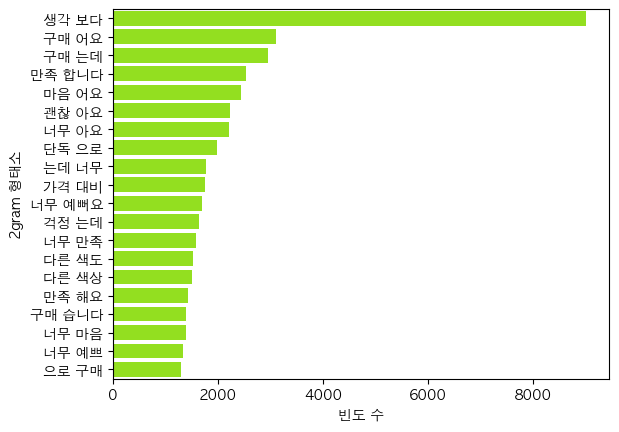

In [48]:
## 2-gram
top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '2gram 형태소')

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '3gram 형태소')]

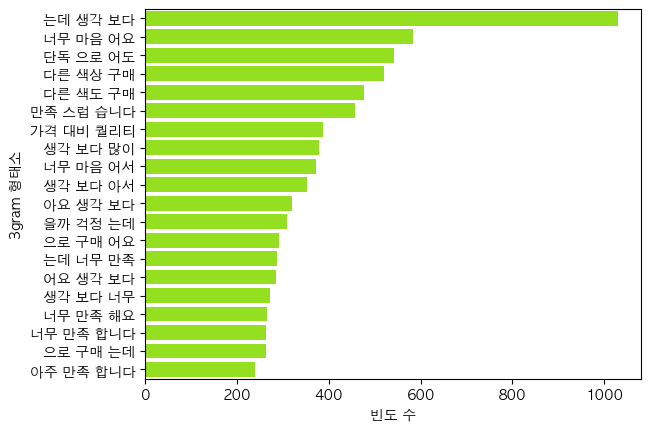

In [49]:
## 3-gram
top_n_bigrams=get_top_ngram(m_corpus,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')

카테고리 - 가방

In [50]:
titles = review.query("카테고리=='가방'")['리뷰 코멘트'].to_list()

m_corpus = []
for t in titles:
    t = clean_text(str(t))
    m_corpus.append(' '.join(m.morphs(t)))


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram 형태소')]

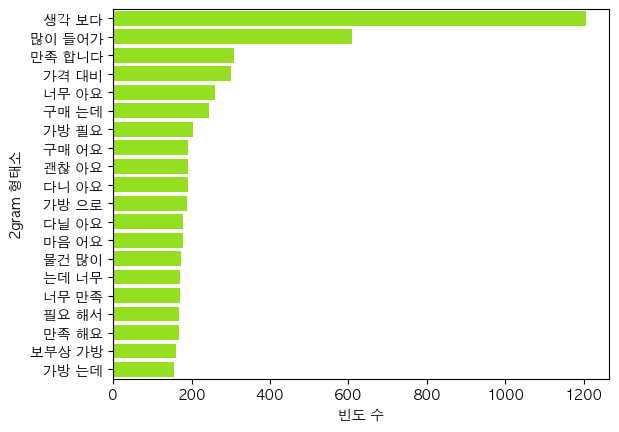

In [51]:
## 2-gram
top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '2gram 형태소')

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '3gram 형태소')]

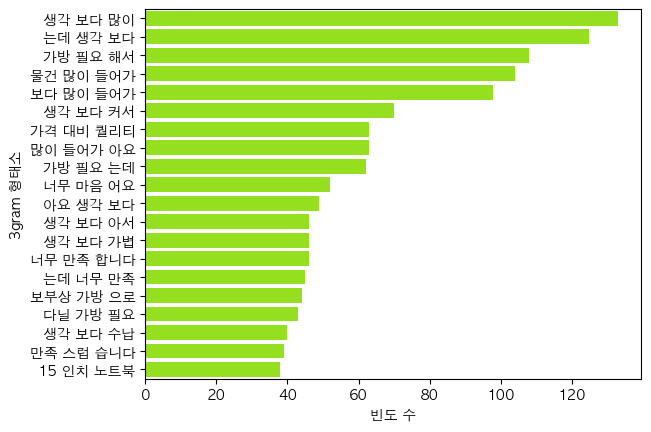

In [52]:
## 3-gram
top_n_bigrams=get_top_ngram(m_corpus,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')

카테고리 - 슈즈

In [53]:
titles = review.query("카테고리=='슈즈'")['리뷰 코멘트'].to_list()

m_corpus = []
for t in titles:
    t = clean_text(str(t))
    m_corpus.append(' '.join(m.morphs(t)))


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram 형태소')]

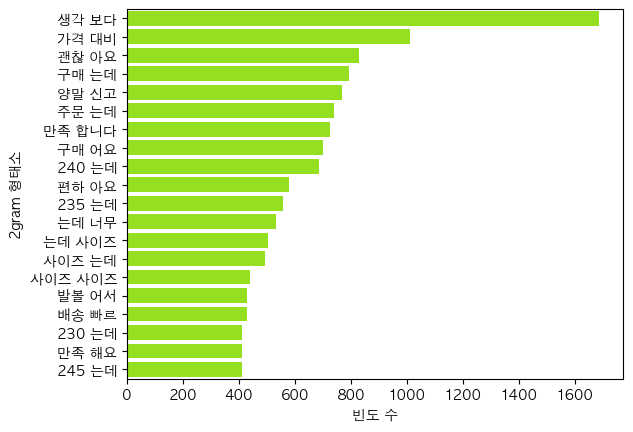

In [54]:
## 2-gram
top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '2gram 형태소')

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '3gram 형태소')]

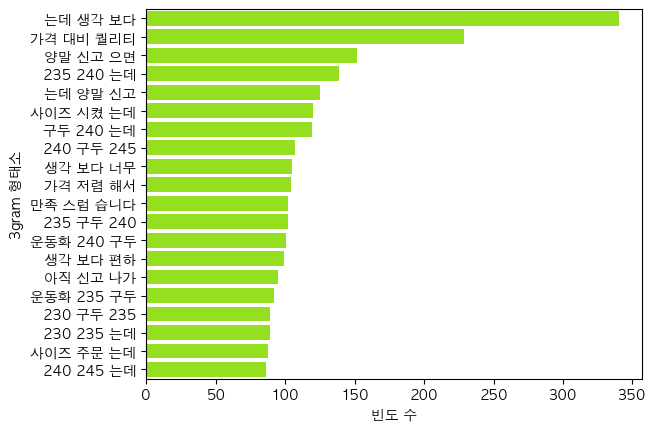

In [55]:
## 3-gram
top_n_bigrams=get_top_ngram(m_corpus,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')

카테고리 - 뷰티

In [56]:
titles = review.query("카테고리=='뷰티'")['리뷰 코멘트'].to_list()

m_corpus = []
for t in titles:
    t = clean_text(str(t))
    m_corpus.append(' '.join(m.morphs(t)))


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '2gram 형태소')]

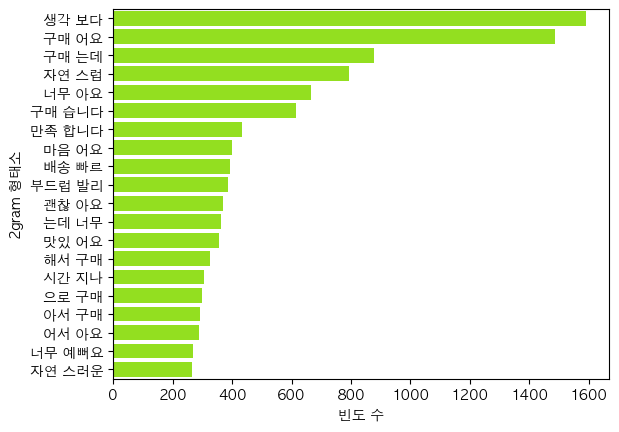

In [57]:
## 2-gram
top_n_bigrams=get_top_ngram(m_corpus,2)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '2gram 형태소')

[Text(0.5, 0, '빈도 수'), Text(0, 0.5, '3gram 형태소')]

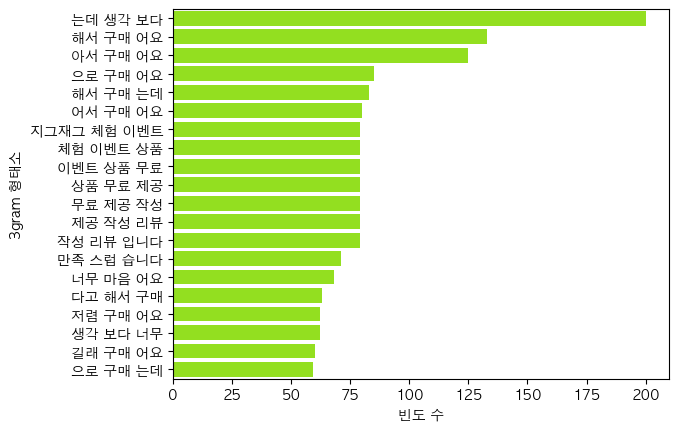

In [58]:
## 3-gram
top_n_bigrams=get_top_ngram(m_corpus,3)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
ax = sns.barplot(x=y,y=x, color='#99FF00')
ax.set(xlabel = '빈도 수', ylabel = '3gram 형태소')